<a href="https://colab.research.google.com/github/akanupam/PyTorch-journey/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Fri Dec 19 20:19:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
# Face detection in phones
# Self Driving Cars
# Traffic management system

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [5]:
#When a workflow works really good on training data but fails to perform similar on the training data, then the model is said to be overfitting.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [6]:
# Early stopping: when validation stops improving then stop the training,
# Regularization
# Adding more diverse data
# Cross Validation techniques

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import torch
from  torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [35]:
train_data = datasets.MNIST(
    root = "data",
    train = True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.MNIST(
    root = "data",
    train = False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
train_data[2]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [10]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [11]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

[]

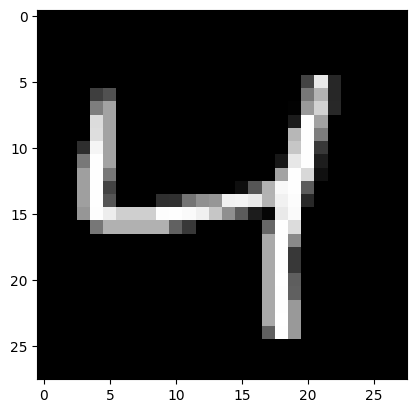

In [12]:
image, label= train_data[2]
plt.imshow(image.squeeze(), cmap="gray")
plt.plot()

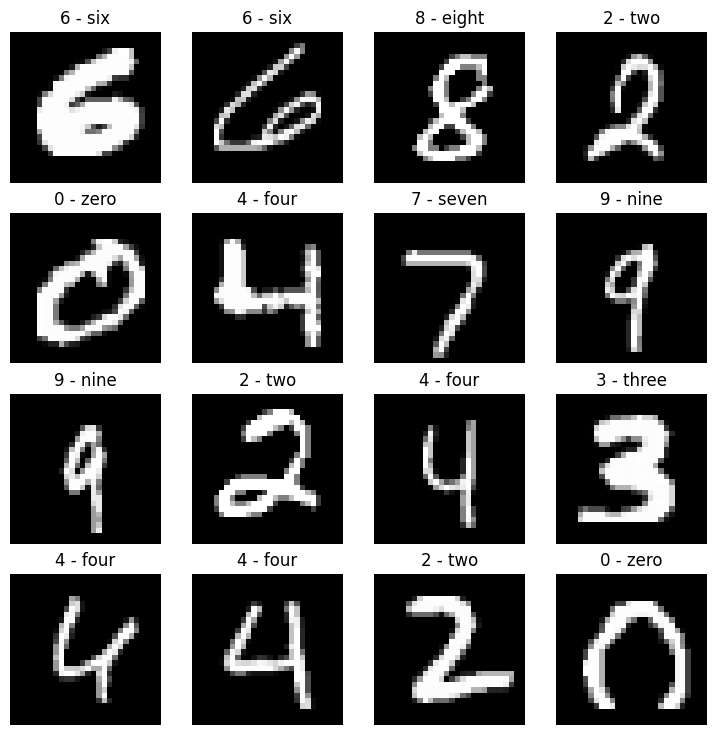

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [38]:
from torch.utils.data import  DataLoader

BATCH_SIZE = 32

training_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle = True
)

testing_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [15]:
print(f"Dataloaders: {training_dataloader, testing_dataloader}")
print(f"Length of the training dataloader: {len(training_dataloader)}")
print(f"Length of the testing dataloader: {len(testing_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b3262829c70>, <torch.utils.data.dataloader.DataLoader object at 0x7b326284f6b0>)
Length of the training dataloader: 1875
Length of the testing dataloader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [30]:
class MNISTmodel(nn.Module):
  def __init__(self, input_shape : int,hidden_units:int, output_shape: int ):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1), # Changed input_shape to hidden_units
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x:torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model = MNISTmodel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(classes)).to(device)
model.to(device)

MNISTmodel(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.1)

In [40]:
!pip -q install torchmetrics
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=len(classes)).to(device)
acc_fn

MulticlassAccuracy()

In [44]:
from tqdm import tqdm
epochs = 5

for epoch in tqdm(range(epochs)):
  train_acc,train_loss = 0,0
  for batch, (X,y) in enumerate(training_dataloader):
    model.train()
    X, y = X.to(device), y.to(device) # Move data to target device
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += acc_fn(y_pred, y.int())
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch%400 == 0:
      print(f"Looked at {batch * len(X)}/{len(training_dataloader.dataset)} samples")

  train_loss /= len(training_dataloader)
  train_acc /= len(training_dataloader)
  test_loss , test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in testing_dataloader:
      X, y = X.to(device), y.to(device) # Move data to target device
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += acc_fn(test_pred, y.int())
    test_loss/=len(testing_dataloader)
    test_acc/=len(testing_dataloader)

  print(f"Training loss: {train_loss},Training accuracy: {train_acc}, Testing Loss: {test_loss}, Testing accuracy: {test_acc}")

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:13<00:53, 13.41s/it]

Training loss: 0.023844920098781586,Training accuracy: 0.9922167062759399, Testing Loss: 0.0362730473279953, Testing accuracy: 0.9879193305969238
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:27<00:41, 13.93s/it]

Training loss: 0.0227401964366436,Training accuracy: 0.992566704750061, Testing Loss: 0.04237937927246094, Testing accuracy: 0.9873202443122864
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [00:41<00:28, 14.02s/it]

Training loss: 0.022883601486682892,Training accuracy: 0.9921500086784363, Testing Loss: 0.04217121750116348, Testing accuracy: 0.9874200820922852
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [00:55<00:13, 13.92s/it]

Training loss: 0.02112518809735775,Training accuracy: 0.993066668510437, Testing Loss: 0.036677081137895584, Testing accuracy: 0.9896165728569031
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [01:09<00:00, 13.86s/it]

Training loss: 0.01959390938282013,Training accuracy: 0.9934333562850952, Testing Loss: 0.04712796211242676, Testing accuracy: 0.9874200820922852


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [49]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Add a batch dimension to the sample before moving to device and passing to model
      sample = sample.unsqueeze(0).to(device)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [46]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [50]:
pred_probs = make_predictions(model=model,
                              data=test_samples)
pred_probs[:2]

tensor([[3.5787e-12, 1.6509e-07, 9.9998e-01, 1.8577e-08, 1.4943e-17, 1.5281e-17,
         3.9357e-13, 1.7304e-10, 1.6082e-05, 2.7969e-12],
        [2.7736e-12, 9.9993e-01, 1.0348e-08, 1.0454e-10, 4.3249e-06, 2.5987e-05,
         3.6646e-05, 1.9364e-10, 2.8792e-06, 5.1103e-07]], device='cuda:0')

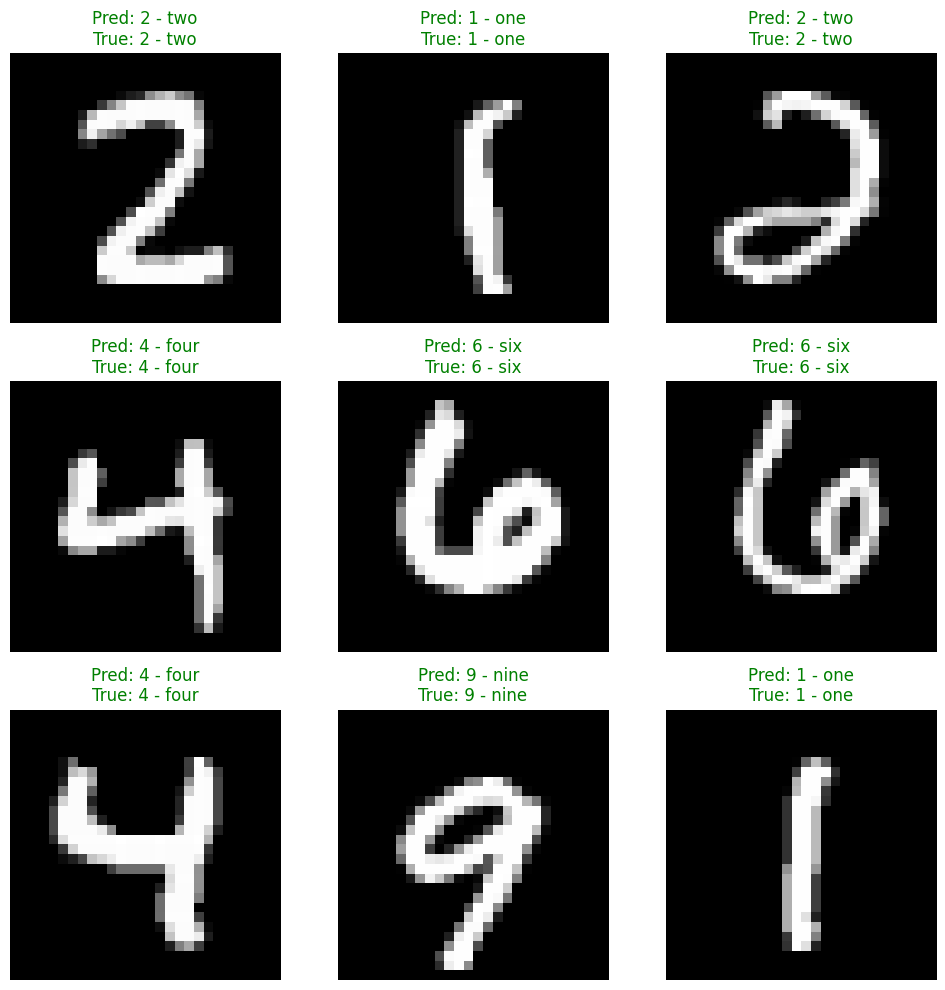

In [51]:
import matplotlib.pyplot as plt

# Get the predicted labels from the probabilities
pred_labels = pred_probs.argmax(dim=1)

# Plot the predictions
rows = 3
cols = 3
plt.figure(figsize=(10, 10))
for i in range(len(test_samples)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_samples[i].squeeze(), cmap="gray")
    pred_class = classes[pred_labels[i].item()]
    true_class = classes[test_labels[i]]
    title_color = "green" if pred_class == true_class else "red"
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}", color=title_color)
    plt.axis(False)
plt.tight_layout()
plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 259.68it/s]


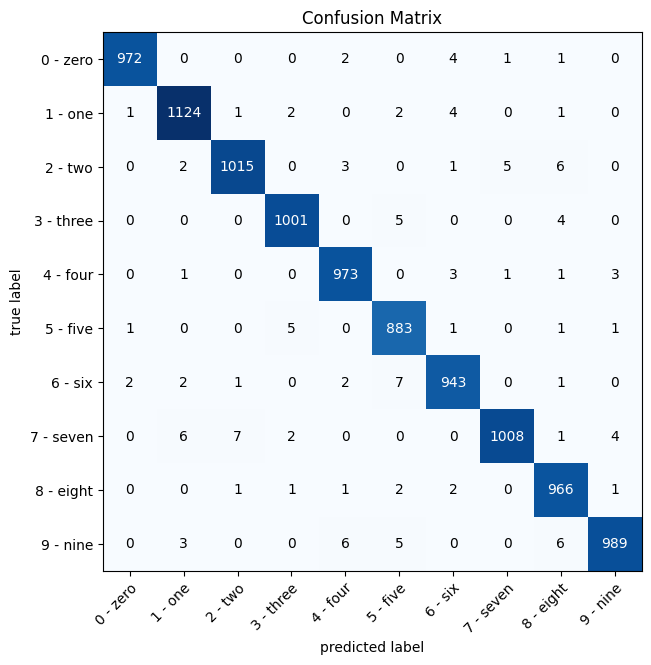

In [53]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions on the entire test dataset
model.eval()
y_preds = []
y_true = []
with torch.inference_mode():
    for X, y in tqdm(testing_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        y_logit = model(X)
        y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
        y_preds.append(y_pred.cpu())
        y_true.append(y.cpu())

y_preds_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_true)

# Setup confusion matrix
confmat = ConfusionMatrix(num_classes=len(classes), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor, target=y_true_tensor)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classes,
    figsize=(10, 7)
)
plt.title("Confusion Matrix")
plt.show()